drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
{'drugY': 91, 'drugX': 54, 'drugA': 23, 'drugC': 16, 'drugB': 16}


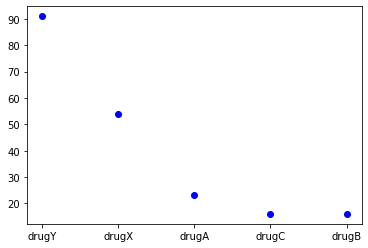

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #7c
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#QUETION 2
df = pd.read_csv("C:/Users/aminn/Desktop/Task2/drug200.csv")
print(df['Drug'].value_counts())
value_list = df['Drug'].value_counts()
data_dict = value_list.to_dict()
print(data_dict)

myfig = plt.plot(data_dict.keys(), data_dict.values(), 'bo')
plt.savefig("drug-distribution.pdf")
plt.show()

In [7]:
# Question 4    
df = pd.read_csv("C:/Users/aminn/Desktop/Task2/drug200.csv")
df.BP = pd.Categorical(df.BP, ['LOW', 'NORMAL', 'HIGH'], ordered= True)
print(df.BP)
df.BP = df.BP.cat.codes
print(df.head())
data_final = pd.get_dummies(df, columns=['Sex', 'Cholesterol'])
print(data_final.head())




0        HIGH
1         LOW
2         LOW
3      NORMAL
4         LOW
        ...  
195       LOW
196       LOW
197    NORMAL
198    NORMAL
199       LOW
Name: BP, Length: 200, dtype: category
Categories (3, object): ['LOW' < 'NORMAL' < 'HIGH']
   Age Sex  BP Cholesterol  Na_to_K   Drug
0   23   F   2        HIGH   25.355  drugY
1   47   M   0        HIGH   13.093  drugC
2   47   M   0        HIGH   10.114  drugC
3   28   F   1        HIGH    7.798  drugX
4   61   F   0        HIGH   18.043  drugY
   Age  BP  Na_to_K   Drug  Sex_F  Sex_M  Cholesterol_HIGH  Cholesterol_NORMAL
0   23   2   25.355  drugY      1      0                 1                   0
1   47   0   13.093  drugC      0      1                 1                   0
2   47   0   10.114  drugC      0      1                 1                   0
3   28   1    7.798  drugX      1      0                 1                   0
4   61   0   18.043  drugY      1      0                 1                   0


In [83]:
# Question 5 Splitting    
Y = data_final[['Drug']]
X = data_final[['Age', 'BP', 'Na_to_K', 'Sex_F', 'Sex_M', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
# X_train : prints out the x_train
#Y_train #prints out the y_train



,Drug
171,drugX
101,drugA
123,drugY
177,drugY
100,drugA
...,...
141,drugY
97,drugY
21,drugY
63,drugX


In [94]:
# Question 6.a
from sklearn import tree

gNB = GaussianNB()
gNB.fit(X_train, Y_train.values.ravel())
GPredict = gNB.predict(X_test)

#6.b
dt_base = DecisionTreeClassifier()
dt_base.fit(X_train, Y_train)
classPredictBaseDT = dt_base.predict(X_test)

#6.c
criterion = ['gini', 'entropy']
max_depth = [2, 4]
min_samples_split = [6, 12, 20]

parameters = {'criterion' : criterion, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
gs = GridSearchCV(decisionTree, param_grid =parameters)
gs.fit(X_train, Y_train)

print('Best Criterion: ', gs.best_estimator_.get_params()['criterion'])
print('Best Max_depth: ', gs.best_estimator_.get_params()['max_depth'])
print('Best Min_amples_split: ', gs.best_estimator_.get_params()['min_samples_split'])

dt_top = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=6)
dt_top.fit(X_train, Y_train)
classPredictTopDT = dt_top.predict(X_test)

Best Criterion:  gini
Best Max_depth:  4
Best Min_amples_split:  6


In [105]:
#Question 6.d Perceptron
from sklearn.linear_model import Perceptron
PER = Perceptron()
PER.fit(X_train, Y_train.values.ravel())

classPredictPER = PER.predict(X_test)

#Question 6.e Base-MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
mlp.fit(X_train, Y_train.values.ravel())
classPredMLP_base = mlp.predict(X_test)

C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
#Question 6.f TOP-MLP
from sklearn.model_selection import GridSearchCV

activation_func = ['logistic', 'tanh', 'relu', 'identity']
network_arch1 = [(30, 50), (10, 10, 10)]
 
solver_ = ['adam', 'sgd']
mlp_t = MLPClassifier(max_iter=4000)
parameters_ = {'activation' : activation_func, 'hidden_layer_sizes' : network_arch1, 'solver' : solver_}
gs_mlp = GridSearchCV(mlp_t, param_grid =parameters_)
gs_mlp.fit(X_train, Y_train.values.ravel())

print('Best activation Function: ', gs_mlp.best_estimator_.get_params()['activation'])
print('Best network architecture: ', gs_mlp.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best solver: ', gs_mlp.best_estimator_.get_params()['solver'])
classPredMLP_top = gs_mlp.predict(X_test)

Best activation Function:  logistic
Best network architecture:  (30, 50)
Best solver:  adam


In [86]:
#Question 7)
print('Question 7')
print('Model a: Gaussian Naive bayes')
print('b) The Confusion matrix')
ConfusionMatrix1 = metrics.confusion_matrix(Y_test, GPredict)
print(ConfusionMatrix1, '\n')
print('c) Precision, Recall, and F1-measure using the Classification Report')
print(classification_report(Y_test, GPredict))
print('d) Accuracy, Macro-Average F1 and Weighted-Average F1')
gaussAccuracy = metrics.accuracy_score(Y_test, GPredict)
gaussMacroF1score = f1_score(Y_test, GPredict, average='macro')
gaussWeightedF1score = f1_score(Y_test, GPredict, average='weighted')

print('Accuracy = ', gaussAccuracy)
print('MacroF1score = ', gaussMacroF1score)
print('WeightedF1score = ', gaussWeightedF1score)
print('--------------------------------------------------------------------------------------')


Question 7
Model a: Gaussian Naive bayes
b) The Confusion matrix
[[ 0  2  1  1  1]
 [ 1  0  0  0  2]
 [ 1  0  1  1  3]
 [ 1  0  2  2  5]
 [ 2  0  5  9 10]] 

c) Precision, Recall, and F1-measure using the Classification Report
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.11      0.17      0.13         6
       drugX       0.15      0.20      0.17        10
       drugY       0.48      0.38      0.43        26

    accuracy                           0.26        50
   macro avg       0.15      0.15      0.15        50
weighted avg       0.29      0.26      0.27        50

D) Accuracy, Macro-Average F1 and Weighted-Average F1
Accuracy =  0.26
MacroF1score =  0.14655565834104223
WeightedF1score =  0.272059204440333
--------------------------------------------------------------------------------------


In [92]:
print('Model b: Base-DT')
print('b) The Confusion matrix')
ConfusionMatrix2 = metrics.confusion_matrix(Y_test, classPredictBaseDT)
print(ConfusionMatrix2, '\n')
print('c) Precision, Recall, and F1-measure using the Classification Report')
print(classification_report(Y_test, classPredictBaseDT))
print('d) Accuracy, Macro-Average F1 and Weighted-Average F1')
dtAccuracy = metrics.accuracy_score(Y_test, classPredictBaseDT)
dtMacroF1score = f1_score(Y_test, classPredictBaseDT, average='macro')
dtWeightedF1score = f1_score(Y_test, classPredictBaseDT, average='weighted')

print('Accuracy = ', dtAccuracy)
print('MacroF1score = ', dtMacroF1score)
print('WeightedF1score = ', dtWeightedF1score)
print('--------------------------------------------------------------------------------------')


Model b: Base-DT
b) The Confusion matrix
[[ 0  1  0  1  3]
 [ 0  0  0  0  3]
 [ 1  0  0  1  4]
 [ 1  0  1  3  5]
 [ 2  0  3 10 11]] 

c) Precision, Recall, and F1-measure using the Classification Report
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.20      0.30      0.24        10
       drugY       0.42      0.42      0.42        26

    accuracy                           0.28        50
   macro avg       0.12      0.14      0.13        50
weighted avg       0.26      0.28      0.27        50

d) Accuracy, Macro-Average F1 and Weighted-Average F1
Accuracy =  0.28
MacroF1score =  0.13261538461538463
WeightedF1score =  0.268
--------------------------------------------------------------------------------------


In [98]:
print('Model c: Top-DT')
print('Hyper parameters values changed: ')
print('criterion: gini/entropy, max_depth = 2, 4 and min_samples_split = 6, 12, 20')
print('Best hyper parameters found: ')
print('b) The Confusion matrix')
ConfusionMatrix3 = metrics.confusion_matrix(Y_test, classPredictTopDT)
print(ConfusionMatrix3, '\n')
print('c) Precision, Recall, and F1-measure using the Classification Report')
print(classification_report(Y_test, classPredictTopDT))
print('d) Accuracy, Macro-Average F1 and Weighted-Average F1')
topDTAccuracy = metrics.accuracy_score(Y_test, classPredictTopDT)
topDTMacroF1score = f1_score(Y_test, classPredictTopDT, average='macro')
topDTWeightedF1score = f1_score(Y_test, classPredictTopDT, average='weighted')

print('Accuracy = ', topDTAccuracy)
print('MacroF1score = ', topDTMacroF1score)
print('WeightedF1score = ', topDTWeightedF1score)
print('--------------------------------------------------------------------------------------')


Model c: Top-DT
Hyper parameters values changed: 
criterion: gini/entropy, max_depth = 2, 4 and min_samples_split = 6, 12, 20
Best hyper parameters found: 
b) The Confusion matrix
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 26]] 

c) Precision, Recall, and F1-measure using the Classification Report
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        10
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

d) Accuracy, Macro-Average F1 and Weighted-Average F1
Accuracy =  1.0
MacroF1score =  1.0
WeightedF1score =  1.0
--------------------------------------------------------

In [103]:
print('Model d: Perceptron')
print('b) The Confusion matrix')
ConfusionMatrix4 = metrics.confusion_matrix(Y_test, classPredictPER)
print(ConfusionMatrix4, '\n')
print('c) Precision, Recall, and F1-measure using the Classification Report')
print(classification_report(Y_test, classPredictPER))
print('d) Accuracy, Macro-Average F1 and Weighted-Average F1')
perAccuracy = metrics.accuracy_score(Y_test, classPredictPER)
perMacroF1score = f1_score(Y_test, classPredictPER, average='macro')
perWeightedF1score = f1_score(Y_test, classPredictPER, average='weighted')

print('Accuracy = ', perAccuracy)
print('MacroF1score = ', perMacroF1score)
print('WeightedF1score = ', perWeightedF1score)
print('--------------------------------------------------------------------------------------')

Model d: Perceptron
b) The Confusion matrix
[[ 2  3  0  0  0]
 [ 0  3  0  0  0]
 [ 0  4  0  1  1]
 [ 1  4  0  2  3]
 [ 0  3  0  8 15]] 

c) Precision, Recall, and F1-measure using the Classification Report
              precision    recall  f1-score   support

       drugA       0.67      0.40      0.50         5
       drugB       0.18      1.00      0.30         3
       drugC       0.00      0.00      0.00         6
       drugX       0.18      0.20      0.19        10
       drugY       0.79      0.58      0.67        26

    accuracy                           0.44        50
   macro avg       0.36      0.44      0.33        50
weighted avg       0.52      0.44      0.45        50

d) Accuracy, Macro-Average F1 and Weighted-Average F1
Accuracy =  0.44
MacroF1score =  0.3314285714285714
WeightedF1score =  0.4527619047619047
--------------------------------------------------------------------------------------


C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
print('Model e: Base MLP')
print('b) The Confusion matrix')             
ConfusionMatrix5 = metrics.confusion_matrix(Y_test, classPredMLP_base)
print(ConfusionMatrix5, '\n')
print('c) Precision, Recall, and F1-measure using the Classification Report')
print(classification_report(Y_test, classPredMLP_base))
print('d) Accuracy, Macro-Average F1 and Weighted-Average F1')
Accuracy5 = metrics.accuracy_score(Y_test, classPredMLP_base)
MacroF1score5 = f1_score(Y_test, classPredMLP_base, average='macro')
WeightedF1score5 = f1_score(Y_test, classPredMLP_base, average='weighted')

print('Accuracy = ', Accuracy5)
print('MacroF1score = ', MacroF1score5)
print('WeightedF1score = ', WeightedF1score5)
print('--------------------------------------------------------------------------------------')

Model e: Base MLP
b) The Confusion matrix
[[ 0  0  0  2  3]
 [ 0  0  0  3  0]
 [ 0  0  0  4  2]
 [ 0  0  0  4  6]
 [ 0  0  0  3 23]] 

c) Precision, Recall, and F1-measure using the Classification Report
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.25      0.40      0.31        10
       drugY       0.68      0.88      0.77        26

    accuracy                           0.54        50
   macro avg       0.19      0.26      0.21        50
weighted avg       0.40      0.54      0.46        50

d) Accuracy, Macro-Average F1 and Weighted-Average F1
Accuracy =  0.54
MacroF1score =  0.21487179487179486
WeightedF1score =  0.46020512820512816
--------------------------------------------------------------------------------------


C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aminn\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
print('Model f: Top MLP')
print('b) The Confusion matrix') 
print('Hyperparameter values: ')
print('solver = adam, sgd; Activation function = logistic, tanh, relu, identity')
print('network architecture = (30, 50), (10, 10, 10)')
print('Best hyperparameters found:')
ConfusionMatrix6 = metrics.confusion_matrix(Y_test, classPredMLP_top)
print(ConfusionMatrix6, '\n')
print('c) Precision, Recall, and F1-measure using the Classification Report')
print(classification_report(Y_test, classPredMLP_top))
print('d) Accuracy, Macro-Average F1 and Weighted-Average F1')
Accuracy6 = metrics.accuracy_score(Y_test, classPredMLP_top)
MacroF1score6 = f1_score(Y_test, classPredMLP_top, average='macro')
WeightedF1score6 = f1_score(Y_test, classPredMLP_top, average='weighted')

print('Accuracy = ', Accuracy6)
print('MacroF1score = ', MacroF1score6)
print('WeightedF1score = ', WeightedF1score6)
print('--------------------------------------------------------------------------------------')


Model f: Top MLP
b) The Confusion matrix
Hyperparameter values: 
solver = adam, sgd; Activation function = logistic, tanh, relu, identity
network architecture = (30, 50), (10, 10, 10)
Best hyperparameters found:
[[ 5  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  5  1  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 26]] 

c) Precision, Recall, and F1-measure using the Classification Report
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      0.83      0.91         6
       drugX       0.91      1.00      0.95        10
       drugY       0.96      1.00      0.98        26

    accuracy                           0.96        50
   macro avg       0.97      0.90      0.93        50
weighted avg       0.96      0.96      0.96        50

d) Accuracy, Macro-Average F1 and Weighted-Average F1
Accuracy =  0.96
MacroF1score =  0.9285207873887119
WeightedF1score =  0.9577557788